In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
from utils import *

# Step1.  스티커 구하기
## 원본 이미지를 살펴보자
### 얼굴 이미지
뭐가 좋다고 빵긋 웃는지 이유 모를 미소가 인상적이다

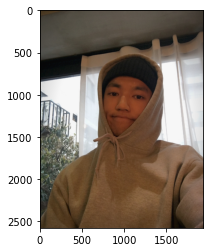

In [2]:
img_rgb, img_bgr = getimage('/project/E10/images/', 'my_face.JPG')

### 스티커 이미지
고양이 수염을 얼굴에 붙이는 실습을 해보려고 한다.

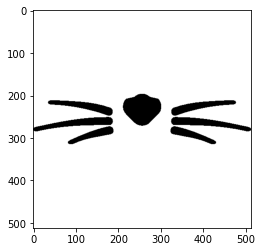

In [3]:
sticker_rgb, sticker_bgr = getimage('/project/E10/images/', 'cat-whiskers.png')

스티커를 회전시키면 이미지 사이즈가 달라지면서  
새롭게 채워지는 영역(양쪽 네 모퉁이)이 0으로 즉 콧수염과  
색상 정보가 똑같아진다.  
이를 방지하기 위해 먼저 이미지를 반전시킨다.

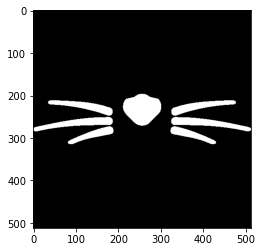

In [4]:
sticker_re = color_reverse(sticker_rgb)

### 실습에 사용하기 위한 이미지로 바꿔보자

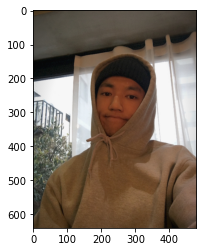

In [5]:
img_resized = img_resize(img_rgb, 480, 640)
img_re = img_resized.copy()

# step 2. 얼굴 검출 & 랜드마크 검출 하기

## Dlib을 활용해 HOG detector를 선언해보자

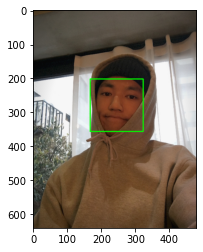

In [6]:
img_bbox, dlib_rects = face_detector(img_resized, pyramid=1)

## Dlib landmark 찾기

# Step 3. 스티커 적용 위치 확인하기  
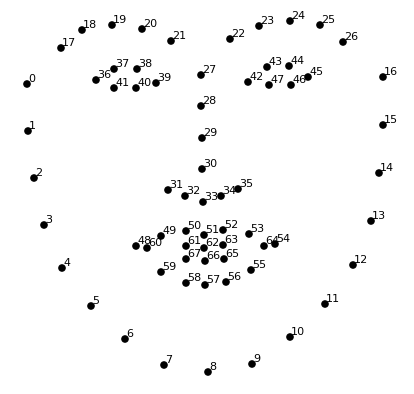  
  
고양이 수염의 코 부분이 얼굴 사진의 코 위치에 와야한다.  
귀척할려고 얼굴을 살짝 기운거 같은데 스티커가 자연스럽게 합성될지 고민이다.  
  
코에서 평행한 곳에 위치한 볼쪽 랜드마크 2번 14번 사이의 길이를 구한다음  
스티커의 까만 코 부분이 얼굴의 코 중앙에 위치시키 위해  
스티커의 중앙 부가 랜드마크 33번과 30번 사이에 올 수 있게 조정한다.

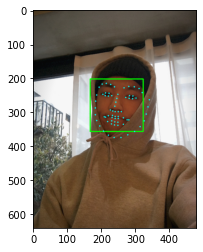

In [7]:
list_landmarks, list_points, img_bbox = get_landmark(img_bbox, dlib_rects)

30번 :  (239, 282)
33번 :  (240, 298)
(x,y):(239,290)
(w,h):(159,149)
rotation : (42)


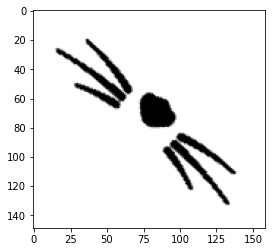

In [8]:
refined_x, refined_y, sticker = set_sticker(dlib_rects, list_landmarks, sticker_re)

# Step 4. 스티커 적용하기

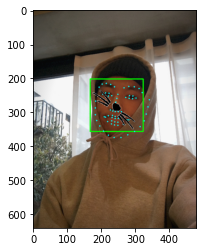

In [9]:
attach_sticker(img_bbox, sticker, refined_x, refined_y)

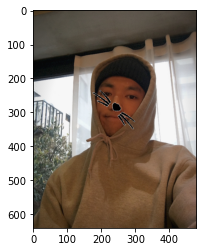

In [10]:
attach_sticker(img_re, sticker, refined_x, refined_y)

## 다양한 변화를 준 이미지에 얼굴검출 확인하기
### 1. 얼굴 각도
다양한 표정과 각도를 가지고 있는 인물사진을 사용하여  
단순한 정면사진이 아니라 다른 각도와 다양한 표정에서 얼굴이 검출되는지 확인해보자

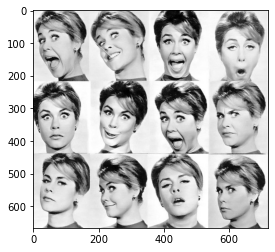

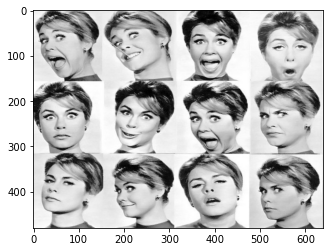

In [2]:
img_rgb, img_bgr = getimage('/project/E10/images/', 'face_angle.jpg')
img_resized = img_resize(img_rgb, 640, 480)
img_og = img_resized.copy()

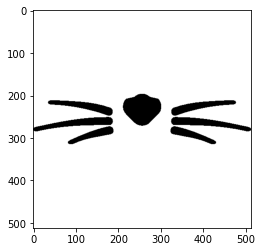

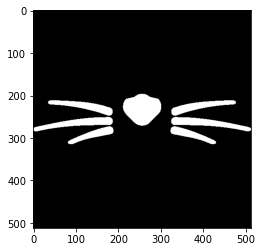

In [3]:
sticker_rgb, sticker_bgr = getimage('/project/E10/images/', 'cat-whiskers.png')
sticker_re = color_reverse(sticker_rgb)

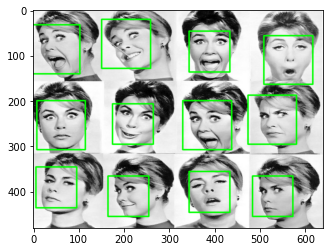

In [4]:
img_bbox, dlib_rects = face_detector(img_resized, pyramid=1)

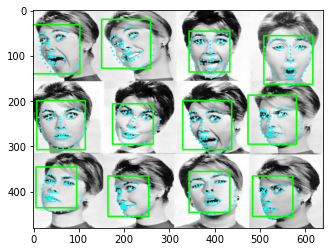

In [5]:
list_landmarks, list_points, img_bbox = get_landmark(img_bbox, dlib_rects)

In [6]:
refined_xs, refined_ys, stickers = set_sticker(dlib_rects, list_landmarks, sticker_re, discribe=False)

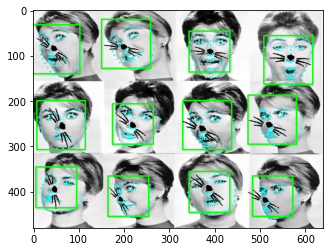

In [7]:
attach_sticker(img_bbox, stickers, refined_xs, refined_ys)

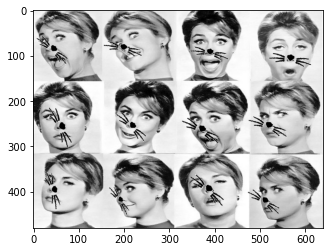

In [8]:
attach_sticker(img_og, stickers, refined_xs, refined_ys)

### 2. 서로 다른 거리에 있는 경우
거리에 따른 얼굴 영역 검출이 잘 되는지 확인해보자.  
다른 뜻은 없고 다양한 거리에 위치한 인물 사진을 찾다보니 발견한 사진이다.  
(우울할땐 <a href='https://youtu.be/4n8vvjlNwik'>돌핀</a>이란 노래를 들어보자)

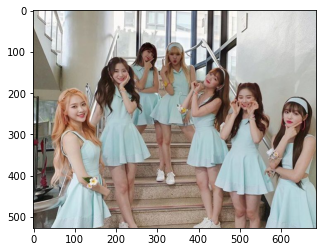

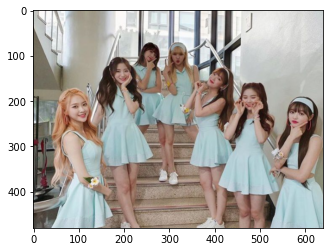

In [9]:
img_rgb, img_bgr = getimage('/project/E10/images/', 'ohmy.jpg')
img_resized = img_resize(img_rgb, 640, 480)
img_og = img_resized.copy()

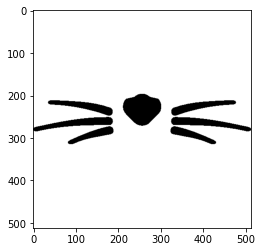

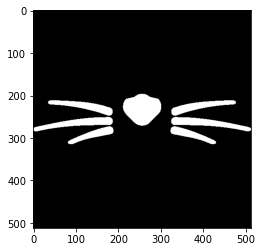

In [10]:
sticker_rgb, sticker_bgr = getimage('/project/E10/images/', 'cat-whiskers.png')
sticker_re = color_reverse(sticker_rgb)

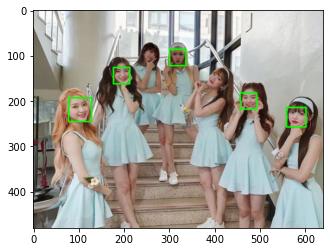

In [11]:
img_bbox, dlib_rects = face_detector(img_resized, pyramid=1)

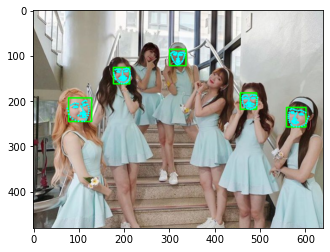

In [12]:
list_landmarks, list_points, img_bbox = get_landmark(img_bbox, dlib_rects)

In [13]:
refined_xs, refined_ys, stickers = set_sticker(dlib_rects, list_landmarks, sticker_re, discribe=False)

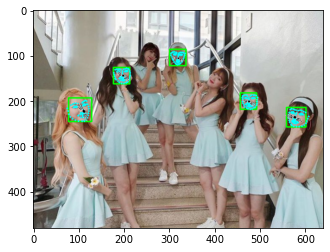

In [14]:
attach_sticker(img_bbox, stickers, refined_xs, refined_ys)

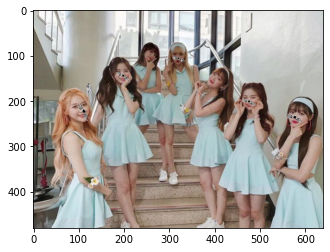

In [15]:
attach_sticker(img_og, stickers, refined_xs, refined_ys)

### 3. 다양한 밝기의 인물사진
누군진 모르겠지만 밝기를 다르게한 동일한 사진을 찾던 중 발견한 사진이다.  
밝기가 달라져도 얼굴영역을 잘 찾아내는지 확인해 보자.

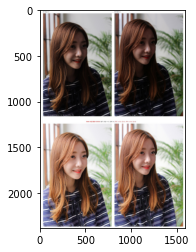

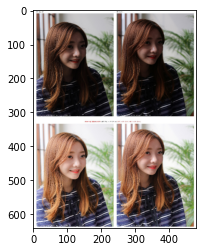

In [20]:
img_rgb, img_bgr = getimage('/project/E10/images/', 'test.jpg')
img_resized = img_resize(img_rgb, 480, 640)
img_og = img_resized.copy()

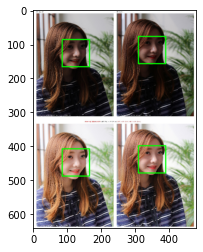

In [21]:
img_bbox, dlib_rects = face_detector(img_resized, pyramid=3)

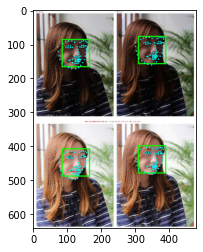

In [22]:
list_landmarks, list_points, img_bbox = get_landmark(img_bbox, dlib_rects)

In [23]:
refined_xs, refined_ys, stickers = set_sticker(dlib_rects, list_landmarks, sticker_re, discribe=False)

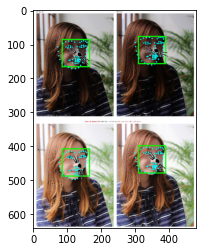

In [24]:
attach_sticker(img_bbox, stickers, refined_xs, refined_ys)

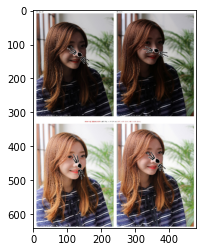

In [25]:
attach_sticker(img_og, stickers, refined_xs, refined_ys)

### 고찰
이미지 사이즈를 조절할 때 어떤 이유에서인지 얼굴 영역을 못 찾는 경우가 있었다.  
detector_hog의 피라미드 값을 올려보아도 얼굴 영역을 찾지 못하였고  
결국 사진 사이즈를 다시 조절하였을 때 찾을 수 있었다.  
  
직접 코딩을 해서 다양한 이미지의 회전이나 밝기 변화를 구현해보았다면 더 좋았겠지만  
시간이 모자라 구글링으로 다운받은 이미지를 사용한 것이 아쉬움으로 남는다.  
  
시간이 모자랐던 이유로 두 가지 문제가 있었다.  
1. 스티커 회전
    스티커를 얼굴이 기울어 져있는 정도나 회전한 정도에 맞게 위치를 재조정하려는 시도를 하였다.  
    이때 얼굴 특징점 중 코 중심점에서 평행선상에 있는 양쪽 볼 위치의 점을 이용하여 벡터의 내적에서  
    $cos\theta$을 이용하여 회전각을 계산하여 스티커 좌표에 반영하였다.  
    하지만 생각과는 다르게 몇몇 이미지(특히 얼굴 회전이 심한 이미지)에서 부자연스럽게 회전되는  
    경우를 확인할 수 있었다.
    
  
2. 이미지에 여러명의 얼굴 검출
    이미지의 얼굴을 검출하는 메소드가 어떤 식으로 bbox 좌표를 받아오고 또 어떤 형태로 얼굴 특징점을 받아오는지 이해하는데 시간이 많이 들었었다.  
    튜툐리얼에서 사용한 코드를 보면 분명 복수의 사람들의 얼굴도 추출이 가능한 것 같았는데 한 명의 사진으로 진행하다 보니 코드의 편의를 위해 여러명일 경우를 포함하고 있지 않았다.  
    따라서 직접 for 문에 들어가는 부분을 수정하여 여러 명의 얼굴 및 특징점 위치를 받아오게 수정해 주어야 했다.  
      
이렇게 다양한 input에 대해 동일한 프로세스를 적용할 경우에는 역시 유용한 함수들을 모듈화(?) 시켜두는게 훨씬 효율적이라는 것을 몸소 느낄 수 있는 시간이었다.  
앞으로 조금 더 효율적인 유틸을 짜는 노력을 해야겠다는 생각이 들었고 나아가 클래스를 만드는 연습도 꾸준히 해야할 필요를 느꼈다. 함수형 프로그래밍을 흉내라도 낼 수 있는 수준으로 빨리 성장하고 싶다.